# NegativeVolumeIndexIndicator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volume import NegativeVolumeIndexIndicator

In [2]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")

## Variations and default correlations

In [3]:
i = NegativeVolumeIndexIndicator(df.close, df.volume)
df["nvi"] = i.negative_volume_index()

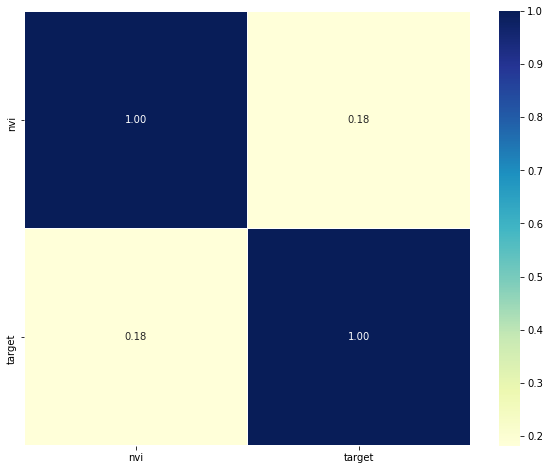

In [4]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

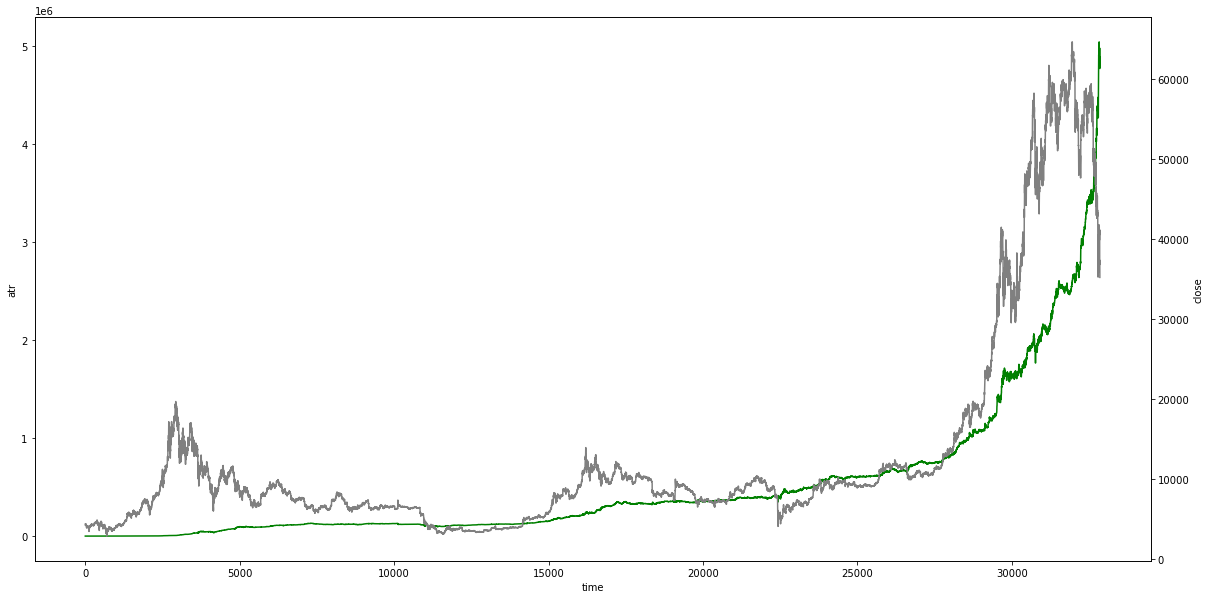

In [5]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(df.nvi,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(df.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Get over close

In [52]:
df["nvi_o_close"] = list(map(lambda n, c: n/c, df.nvi, df.close))
# df["nvi_o_close_rate_10"] = uf.get_rate(uf.get_moving_average(df.nvi_o_close, 10))
# df["nvi_o_close_rate_20"] = uf.get_rate(uf.get_moving_average(df.nvi_o_close, 20))
df["nvi_o_close_rate_50"] = uf.get_rate(uf.get_moving_average(df.nvi_o_close, 50))
# df["nvi_o_close_rate_100"] = uf.get_rate(uf.get_moving_average(df.nvi_o_close, 100))
df["nvi_o_close_rate_1000"] = uf.get_rate(uf.get_moving_average(df.nvi_o_close, 1000))
df["nvi_o_close_rate_50_amplified"] = list(map(lambda x: uf.log_abs(x*100), df.nvi_o_close_rate_50))

df["nvi_o_sma_50"] = list(map(lambda n, c: n/c, df.nvi, uf.get_moving_average(df.close, 50)))
df["nvi_o_sma_rate_50"] = uf.get_rate(uf.get_moving_average(df.nvi_o_sma_50, 50))


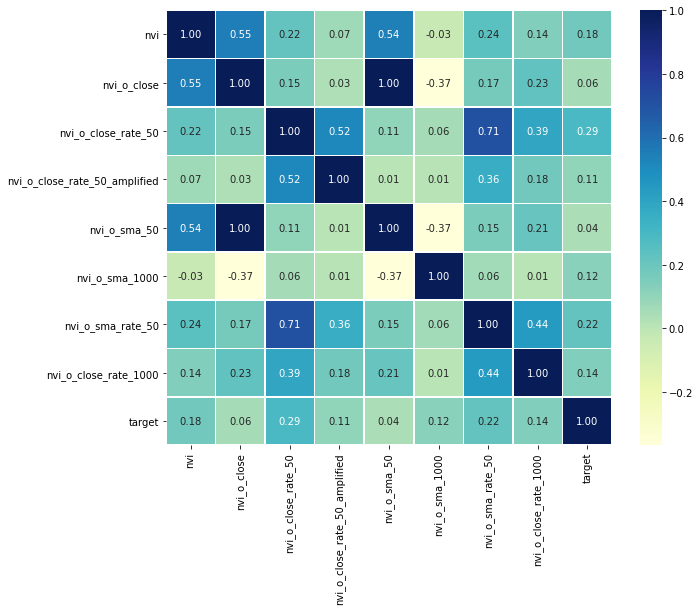

In [53]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

In [60]:
d.tb_base_av

Index(['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore', 'target',
       'nvi', 'nvi_o_close', 'nvi_o_close_rate_50',
       'nvi_o_close_rate_50_amplified', 'nvi_o_sma_50', 'nvi_o_sma_1000',
       'nvi_o_sma_rate_50', 'nvi_o_close_rate_1000'],
      dtype='object')

In [57]:
d = df[-1000:]

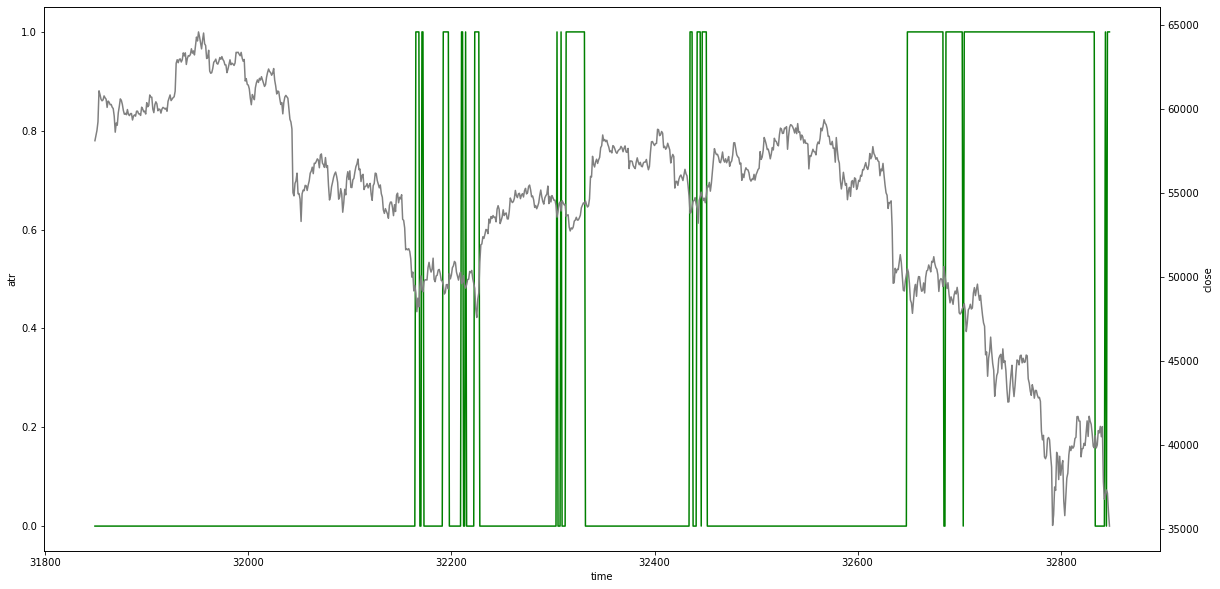

In [64]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.target,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

## Get rate

In [26]:
df["nvi_rate"] = uf.get_rate(uf.get_moving_average(df.nvi, 50))


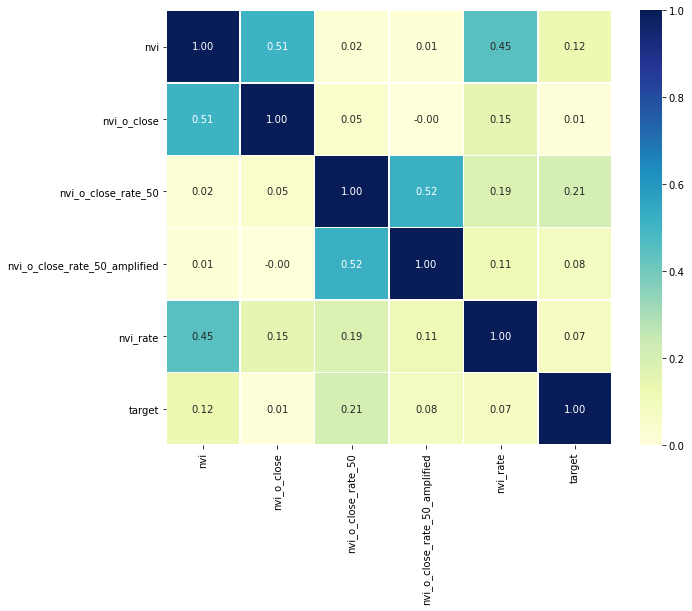

In [27]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

# Conclusion: nvi_o_close_rate_50